In [19]:
file = open("CA-HepTh.txt", "r")
data = file.readlines()
file.close()
print(data)

['# Directed graph (each unordered pair of nodes is saved once): CA-HepTh.txt \n', '# Collaboration network of Arxiv High Energy Physics Theory category (there is an edge if authors coauthored at least one paper)\n', '# Nodes: 9877 Edges: 51971\n', '# FromNodeId\tToNodeId\n', '24325\t24394\n', '24325\t40517\n', '24325\t58507\n', '24394\t3737\n', '24394\t3905\n', '24394\t7237\n', '24394\t12715\n', '24394\t13648\n', '24394\t13659\n', '24394\t13664\n', '24394\t14304\n', '24394\t14823\n', '24394\t17370\n', '24394\t18956\n', '24394\t19615\n', '24394\t19660\n', '24394\t21669\n', '24394\t23106\n', '24394\t24325\n', '24394\t24832\n', '24394\t26021\n', '24394\t26363\n', '24394\t28240\n', '24394\t35376\n', '24394\t35424\n', '24394\t36383\n', '24394\t36860\n', '24394\t37616\n', '24394\t37932\n', '24394\t39984\n', '24394\t41687\n', '24394\t44934\n', '24394\t48192\n', '24394\t51464\n', '24394\t55079\n', '24394\t58507\n', '24394\t59077\n', '24394\t59471\n', '24394\t59870\n', '24394\t61742\n', '24394

In [20]:
# Removing the escape character \n

data_no_escape_character = []
for line in data[4:]:
    if line[-1] == "\n":
        data_no_escape_character.append(line[:-1])
    else:
        data_no_escape_character.append(line)
print(data_no_escape_character)

['24325\t24394', '24325\t40517', '24325\t58507', '24394\t3737', '24394\t3905', '24394\t7237', '24394\t12715', '24394\t13648', '24394\t13659', '24394\t13664', '24394\t14304', '24394\t14823', '24394\t17370', '24394\t18956', '24394\t19615', '24394\t19660', '24394\t21669', '24394\t23106', '24394\t24325', '24394\t24832', '24394\t26021', '24394\t26363', '24394\t28240', '24394\t35376', '24394\t35424', '24394\t36383', '24394\t36860', '24394\t37616', '24394\t37932', '24394\t39984', '24394\t41687', '24394\t44934', '24394\t48192', '24394\t51464', '24394\t55079', '24394\t58507', '24394\t59077', '24394\t59471', '24394\t59870', '24394\t61742', '24394\t61796', '24394\t62227', '24394\t65346', '24394\t66689', '24394\t67851', '24897\t30545', '24897\t42653', '42653\t1182', '42653\t3175', '42653\t5379', '42653\t24897', '42653\t33426', '42653\t34071', '42653\t36192', '42653\t39688', '42653\t63113', '42653\t65086', '42653\t66829', '42653\t68041', '44934\t554', '44934\t3088', '44934\t4503', '44934\t4521', '4

In [21]:
# Removing \t and saving it into two columns
column1 = []
column2 = []

for line in data_no_escape_character:
    col1, col2 = line.split("\t")
    column1.append(col1)
    column2.append(col2)

print(type(column1))
print(len(column1), len(column2))
print(column1[0], column2[0])

<class 'list'>
51971 51971
24325 24394


In [ ]:
# putting each pair of elements in pair into an empty file
with open("processed_data.txt", "a") as processed_data:
    for element1, element2 in zip(column1, column2):
        processed_data.write(f"{element1} {element2}\n")

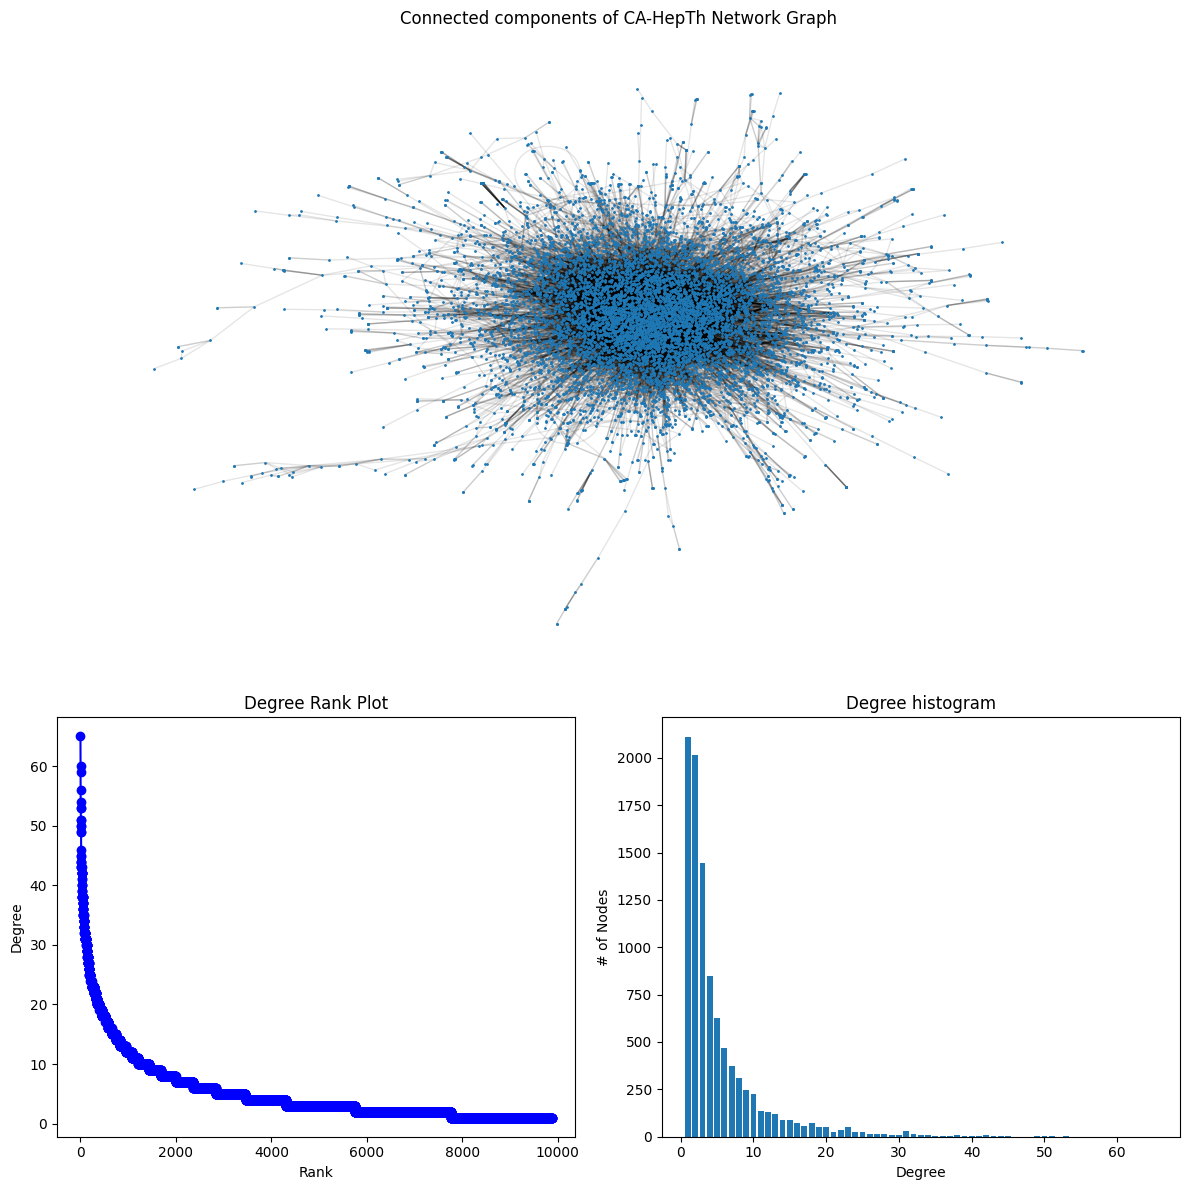

In [27]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.read_edgelist("processed_data.txt", nodetype=int)

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of CA-HepTh Network Graph", figsize=(12, 12))
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc)
# print(pos)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=1)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.1)
ax0.set_title("Connected components of CA-HepTh Network Graph")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.savefig("graph_image_ca-hepth.png", dpi=500)
plt.show()